In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [57]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, InputLayer
from matplotlib import pyplot as plt

In [34]:
df = pd.read_csv('data\merge_data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [35]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

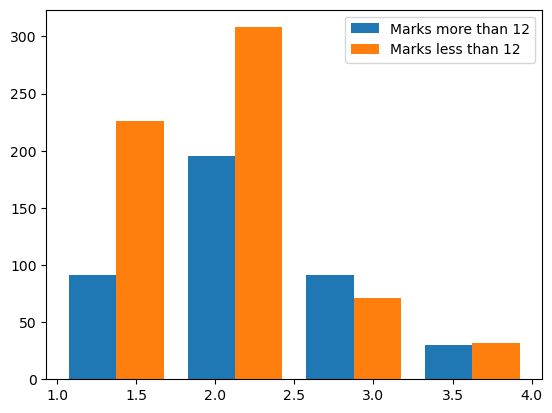

In [36]:
good = df[df.G3 > 12].studytime
bad = df[df.G3 <= 12].studytime

plt.hist([good, bad], bins=4, label=['Marks more than 12', 'Marks less than 12'])
plt.legend(loc='upper right')

In [37]:
for column in df:
    if df[column].dtype == 'object':
        print(f'{column} : {df[column].unique()}')

school : ['GP' 'MS']
sex : ['F' 'M']
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']


In [38]:
yes_no_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for column in yes_no_columns:
    df[column] = df[column].map({'yes': 1, 'no': 0})

In [39]:
df['school'] = df['school'].map({'GP': 1, 'MS': 0})
df['sex'] = df['sex'].map({'F': 1, 'M': 0})
df['address'] = df['address'].map({'U': 1, 'R': 0})
df['famsize'] = df['famsize'].map({'GT3': 1, 'LE3': 0})
df['Pstatus'] = df['Pstatus'].map({'T': 1, 'A': 0})


In [40]:
for column in df:
    print(f'{column} : {df[column].unique()}')

school : [1 0]
sex : [1 0]
age : [18 17 15 16 19 22 20 21]
address : [1 0]
famsize : [1 0]
Pstatus : [0 1]
Medu : [4 1 3 2 0]
Fedu : [4 1 2 3 0]
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
traveltime : [2 1 3 4]
studytime : [2 3 1 4]
failures : [0 3 1 2]
schoolsup : [1 0]
famsup : [0 1]
paid : [0 1]
activities : [0 1]
nursery : [1 0]
higher : [1 0]
internet : [0 1]
romantic : [0 1]
famrel : [4 5 3 1 2]
freetime : [3 2 4 1 5]
goout : [4 3 2 1 5]
Dalc : [1 2 5 3 4]
Walc : [1 3 2 4 5]
health : [3 5 1 2 4]
absences : [ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3
 25 54 20 56 28 75 19 38 40 23 17]
G1 : [ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19  3]
G2 : [11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5  4]
G3 : [11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19 20  4]


In [41]:
df2 = pd.get_dummies(df, columns=['Mjob', 'Fjob', 'reason', 'guardian'])
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,20,1,0,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
1040,0,0,17,1,0,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
1041,0,0,21,0,1,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
1042,0,0,18,0,0,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [42]:
col_to_scale = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [43]:
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,0.428571,1,1,0,1.00,1.00,0.333333,0.333333,...,0,0,1,1,0,0,0,0,1,0
1,1,1,0.285714,1,1,1,0.25,0.25,0.000000,0.333333,...,1,0,0,1,0,0,0,1,0,0
2,1,1,0.000000,1,0,1,0.25,0.25,0.000000,0.333333,...,1,0,0,0,0,1,0,0,1,0
3,1,1,0.000000,1,1,1,1.00,0.50,0.000000,0.666667,...,0,1,0,0,1,0,0,0,1,0
4,1,1,0.142857,1,1,1,0.75,0.75,0.000000,0.333333,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,0.714286,1,0,0,0.50,0.50,0.000000,0.333333,...,0,1,0,1,0,0,0,0,0,1
1040,0,0,0.285714,1,0,1,0.75,0.25,0.333333,0.000000,...,0,1,0,1,0,0,0,0,1,0
1041,0,0,0.857143,0,1,1,0.25,0.25,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,1
1042,0,0,0.428571,0,0,1,0.75,0.50,0.666667,0.000000,...,1,0,0,1,0,0,0,0,1,0


In [66]:
# df2.drop(['G1', 'G2'], axis='columns', inplace=True)
x = df2.drop('G3',axis='columns').to_numpy()
y = df2['G3'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [62]:
X_train.shape

(730, 43)

In [63]:

X_test.shape

(314, 43)

In [67]:
model = Sequential()
model.add(Dense(2, input_dim = 43, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 2)                 88        
                                                                 
 dense_26 (Dense)            (None, 1)                 3         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
history = model.fit(X_train, y_train ,verbose=1, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
23/23 [==============================] - 2s 88ms/step - loss: 0.4262 - val_loss: 0.3779
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3303 - val_loss: 0.2936
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2517 - val_loss: 0.2086
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1642 - val_loss: 0.1241
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0914 - val_loss: 0.0712
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0575 - val_loss: 0.0555
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0500 - val_loss: 0.0534
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0487 - val_loss: 0.0523
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0476 - val_loss: 0.0513
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0467 - val_loss: 0.0504
Epoch 11

In [70]:
prediction_test = model.predict(X_test)
print(y_test, prediction_test)
print("MSE = ", np.mean(prediction_test - y_test)**2)

10/10 [==============================] - 0s 2ms/step
[0.55 0.5  0.7  0.45 0.5  0.   0.7  0.5  0.6  0.55 0.65 0.4  0.3  0.6
 0.65 0.5  0.5  0.9  0.8  0.5  0.55 0.75 0.4  0.6  0.55 0.55 0.75 0.75
 0.7  0.7  0.7  0.3  0.45 0.45 0.8  0.6  0.55 0.55 0.4  0.5  0.75 0.8
 0.6  0.6  0.55 0.55 0.45 0.8  0.4  0.55 0.   0.6  0.35 0.   0.6  0.45
 0.5  0.8  0.5  0.5  0.   0.7  0.55 0.4  0.55 0.65 0.75 0.55 0.   0.8
 0.55 0.55 0.65 0.4  0.7  0.6  0.8  0.55 0.55 0.85 0.   0.6  0.55 0.
 0.55 0.7  0.7  0.65 0.5  0.7  0.65 0.5  0.5  0.9  0.4  0.45 0.85 0.4
 0.6  0.55 0.5  0.45 0.65 0.5  0.   0.7  0.7  0.8  0.55 0.3  0.7  0.6
 0.9  0.7  0.6  0.   0.25 0.45 0.4  0.8  0.45 0.7  0.3  0.7  0.7  0.65
 0.55 0.5  0.35 0.4  0.7  0.9  0.6  0.5  0.55 0.7  0.5  0.75 0.75 0.6
 0.55 0.5  0.7  0.65 0.5  0.55 0.8  0.9  0.35 0.7  0.55 0.45 0.6  0.65
 0.4  0.   0.5  0.5  0.55 0.8  0.6  0.8  0.5  0.5  0.2  0.6  0.7  0.75
 0.35 0.7  0.65 0.45 0.45 0.5  0.75 0.5  0.5  0.8  0.8  0.55 0.65 0.7
 0.7  0.5  0.5  0.   0.6  0.7  0.

In [79]:
yp = model.predict(X_test)
yp[:10]

10/10 [==============================] - 0s 4ms/step


array([[0.55077225],
       [0.5648587 ],
       [0.66414684],
       [0.58072674],
       [0.5585129 ],
       [0.4392436 ],
       [0.6649466 ],
       [0.6119113 ],
       [0.70741194],
       [0.5745763 ]], dtype=float32)

In [80]:
y_test[:10]

array([0.55, 0.5 , 0.7 , 0.45, 0.5 , 0.  , 0.7 , 0.5 , 0.6 , 0.55])

In [81]:
X_test[:10]

array([[1.        , 1.        , 0.28571429, 0.        , 0.        ,
        1.        , 0.5       , 0.5       , 0.        , 0.66666667,
        0.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.        , 0.5       ,
        0.5       , 0.25      , 0.25      , 0.25      , 0.5       ,
        0.04      , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.42857143, 0.        , 0.        ,
        1.        , 0.75      , 0.75      , 0.        , 0.33333333,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 1.        , 1.        , 0.75      ,
        0.5       , 0.5       , 0.        , 0.5       , 1.        ,
        0.10666667, 0.        , 0.        , 1.        , 0.        ,
   